<a href="https://colab.research.google.com/github/NimraMushtaq/ml-projects/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [22]:
# Load dataset from MNIST library
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
# print(x_test[0])

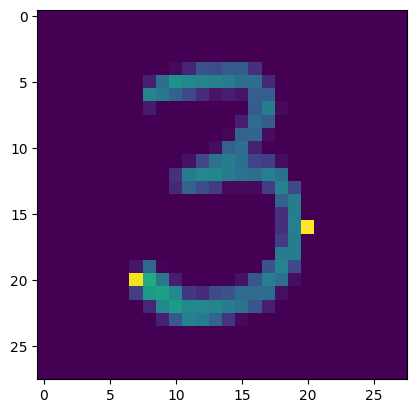

Label :  3


In [11]:
plt.imshow(x_train[50])
plt.show()
print("Label : ",y_train[50])

In [24]:
# unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [49]:
# Scaling values
x_train = x_train/255
x_test = x_test/255
# print(x_test[0])

In [26]:
# Define Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size = 100)

model.save('mnist_digit_classifier.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8849 - loss: 0.3955
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9735 - loss: 0.0840
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9835 - loss: 0.0521
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9880 - loss: 0.0380
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9899 - loss: 0.0303
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9919 - loss: 0.0252
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9925 - loss: 0.0223
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9954 - loss: 0.0134
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9943 - loss: 0.0175
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9941 - loss: 0.0169


In [45]:
# Loading saved model
model = tf.keras.models.load_model('mnist_digit_classifier.keras')
loss, accuracy = model.evaluate(x_test,y_test)

print("Loss: ",loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9728 - loss: 0.1228
Loss:  0.10871575772762299
Accuracy:  0.975600004196167


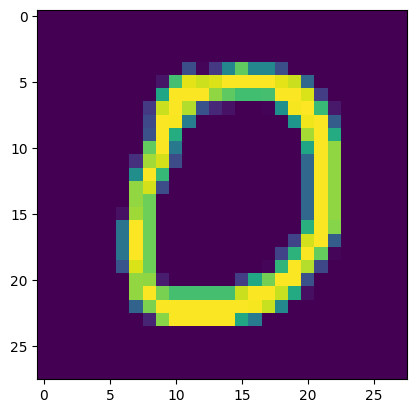

In [46]:
plt.imshow(x_test[10])
plt.show()

In [47]:
print(y_test[10])

0


In [31]:
# prediction for al 10000 test images
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [32]:
print(y_pred.shape)

(10000, 10)


In [33]:
# when we predict it will tell you the probability of a certain label
# so these 10 values are probability of all labels with 9.99 being highest for 0
print(y_pred[10])

[9.99999940e-01 3.62527425e-14 1.34637631e-11 1.11710136e-14
 2.34257232e-15 3.98299761e-14 3.43429386e-13 4.31718931e-11
 1.60153485e-15 7.54179011e-12]


In [36]:
# converting probabilities to label using argmax()
label_for_image = np.argmax(y_pred[10])
print(label_for_image)

0


In [48]:
# Converting all probabilities to labels
y_pred_labels = [np.argmax(i) for i in y_pred]
# print(y_pred_labels)
print(len(y_pred_labels))

10000


y_test -> true labels

y_pred_labels -> predicted labels


In [42]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 963    0    7    1    2    2    1    1    3    0]
 [   0 1124    1    0    0    0    0    1    9    0]
 [   0    0 1011    8    1    0    0    6    6    0]
 [   0    0    2  998    0    1    0    4    3    2]
 [   0    0    5    0  962    0    1    1    2   11]
 [   2    0    0   20    2  860    1    1    6    0]
 [   3    4    8    1   13   13  910    0    6    0]
 [   1    0    4    2    2    0    0 1017    1    1]
 [   0    0    3    9    5    3    0    3  948    3]
 [   2    4    0    6   14    1    1   17    1  963]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

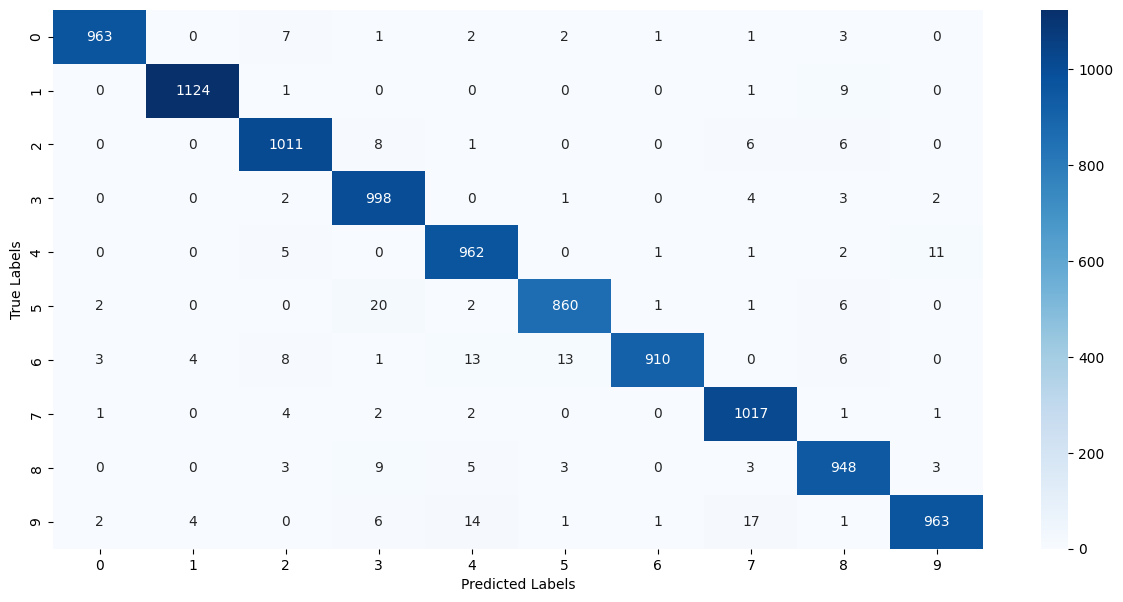

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
This digit is probably a 2


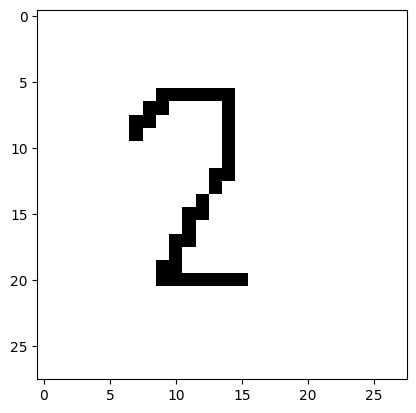

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This digit is probably a 3


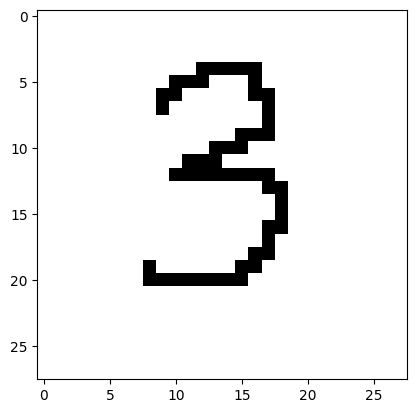

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 1


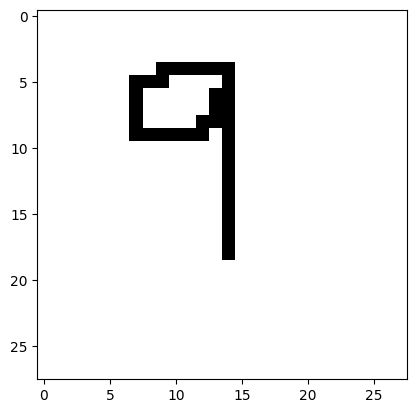

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably a 1


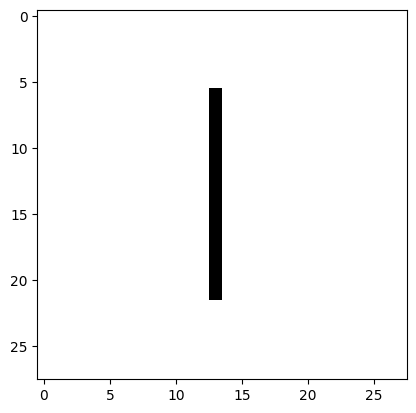

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 2


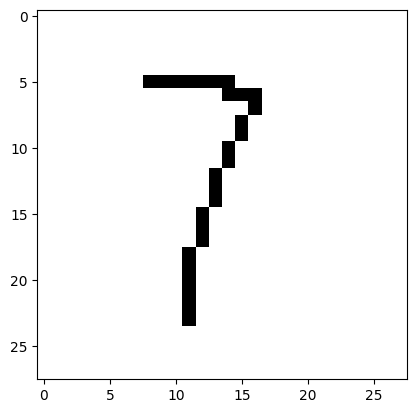

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably a 4


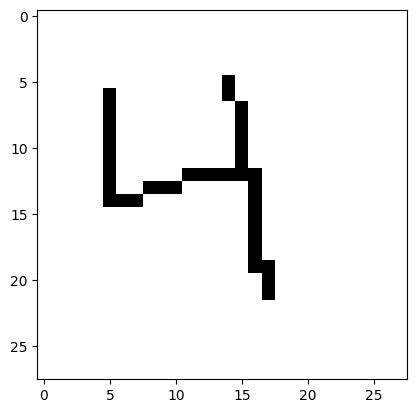

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
This digit is probably a 4


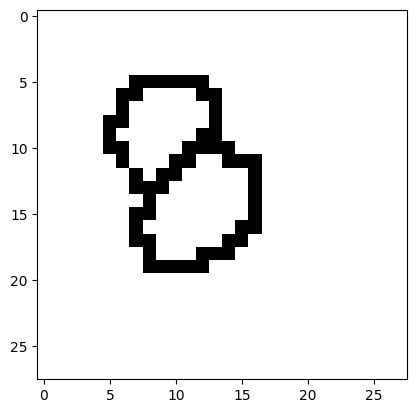

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 0


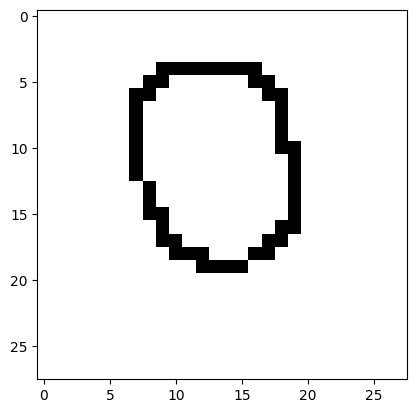

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This digit is probably a 6


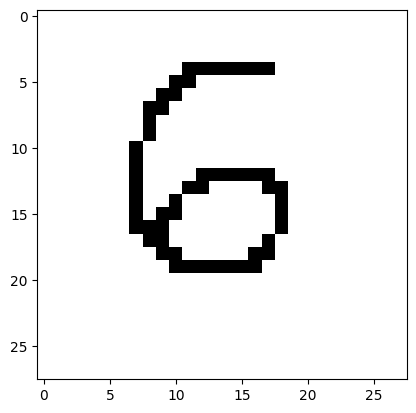

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This digit is probably a 5


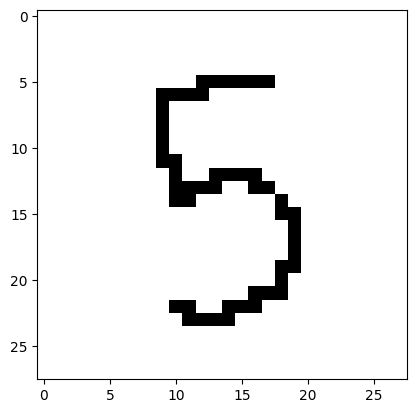

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This digit is probably a 2


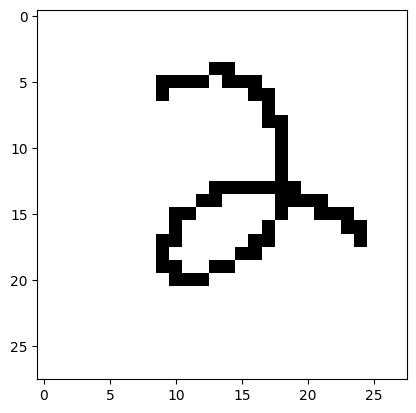

In [44]:
#  Testing Model on data
import os
image_number = 1
while os.path.isfile(f'/content/drive/MyDrive/Colab Notebooks/Dataset/Digits/{image_number}.png'):
  try:
    img_path = f'/content/drive/MyDrive/Colab Notebooks/Dataset/Digits/{image_number}.png'
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    # argmax outputs the neuron with highest probability of being correct
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error")
  finally:
    image_number += 1